In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
sns.set()

In [6]:
DATASET = 'data/RESNET_CORRUPT'
TRAIN_CSV = DATASET+'_df.csv'
SUBCLIPS_CSV = DATASET+'_subclips.csv'

In [7]:
train_df = pd.read_csv(TRAIN_CSV)
train_df.head()

,video_path,frame_time,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_502,x_503,x_504,x_505,x_506,x_507,x_508,x_509,x_510,x_511
0,../data/1943 - Victory Through Air Power.avi,24.3,0.002256,0.004421,0.001887,0.002662,0.001564,0.001537,0.003155,0.002835,...,0.000532,0.002854,0.001393,0.001922,0.001442,0.002265,0.000333,0.004528,0.002242,0.002093
1,../data/1943 - Victory Through Air Power.avi,81.5,0.002971,0.002510,0.000025,0.009168,0.000101,0.000021,0.001093,0.000179,...,0.000000,0.000667,0.000000,0.002354,0.000600,0.000690,0.001086,0.001711,0.000986,0.000831
2,../data/1943 - Victory Through Air Power.avi,100.7,0.002903,0.001350,0.000405,0.005866,0.000058,0.000301,0.001022,0.000554,...,0.001589,0.001533,0.000286,0.000988,0.003068,0.001484,0.000858,0.007149,0.000645,0.001064
3,../data/1943 - Victory Through Air Power.avi,113.6,0.002190,0.001877,0.001158,0.008881,0.001010,0.000019,0.001336,0.000110,...,0.000296,0.000572,0.001094,0.000836,0.002934,0.003569,0.002012,0.002772,0.001326,0.002140
4,../data/1943 - Victory Through Air Power.avi,224.0,0.001398,0.003952,0.000894,0.003293,0.000588,0.001572,0.003891,0.000277,...,0.001087,0.002928,0.001247,0.000340,0.001110,0.001994,0.002608,0.005070,0.001339,0.001616


In [8]:
subclips_df = pd.read_csv(SUBCLIPS_CSV)
subclips_df.head()

,clip_path,frame_time,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_503,x_504,x_505,x_506,x_507,x_508,x_509,x_510,x_511,video_path
0,./tmp/1943 - Victory Through Air Power.avi_sub...,7.8,0.002757,0.003106,0.001479,0.003573,0.001363,0.000056,0.000149,0.000668,...,0.006935,0.000394,0.002591,0.000345,0.001092,0.001841,0.006010,0.000698,0.003867,../data/1943 - Victory Through Air Power.avi
1,./tmp/1943 - Victory Through Air Power.avi_sub...,9.2,0.002641,0.004615,0.001838,0.003907,0.001943,0.000153,0.000872,0.000456,...,0.006034,0.000390,0.002202,0.000585,0.000342,0.002236,0.003293,0.000076,0.003101,../data/1943 - Victory Through Air Power.avi
2,./tmp/1943 - Victory Through Air Power.avi_sub...,10.5,0.001617,0.002560,0.000945,0.003208,0.000838,0.000107,0.001529,0.002334,...,0.002776,0.003532,0.001550,0.000377,0.004595,0.001324,0.005592,0.000291,0.002019,../data/1943 - Victory Through Air Power.avi
3,./tmp/1943 - Victory Through Air Power.avi_sub...,11.8,0.005631,0.002601,0.002941,0.002259,0.001500,0.000004,0.002048,0.002849,...,0.004458,0.001706,0.002830,0.000218,0.002066,0.001777,0.002484,0.000564,0.002196,../data/1943 - Victory Through Air Power.avi
4,./tmp/1943 - Victory Through Air Power.avi_sub...,13.1,0.003583,0.002408,0.001967,0.002375,0.001082,0.000094,0.002218,0.002395,...,0.003754,0.001493,0.002793,0.000299,0.001863,0.002550,0.001465,0.000945,0.003155,../data/1943 - Victory Through Air Power.avi


In [9]:
subclips_df.video_path.value_counts()

../data/1928 - Mickey Mouse -  Steamboat Willie.mp4          126
../data/1945 - The Three Caballeros.avi                      119
../data/1946 - Song of the South.avi                         116
../data/1940 - Pinocchio.avi                                 113
../data/1943 - Victory Through Air Power.avi                 110
../data/1947 - Fun and Fancy Free.avi                        109
../data/1948 - So Dear to My Heart.mp4                       106
../data/The.Young.Pope.S01E01.HDTVRip.Jaskier.avi            103
../data/1949 - The Adventures Of Ichabod And Mr. Toad.m4v    102
../data/1941 - Dumbo.avi                                     102
../data/The.Young.Pope.S01E02.HDTVRip.Jaskier.avi             98
../data/1948 - Melody Time.avi                                96
../data/The.Young.Pope.S01E04.HDTVRip.Jaskier.avi             96
../data/1929 - Mickey Mouse - Plane Crazy.avi                 92
../data/The.Young.Pope.S01E03.HDTVRip.Jaskier.avi             92
../data/1946 - Make Mine 

In [10]:

# PCA visualization of the dataset

frame_times = train_df.frame_time
labels = train_df.video_path.astype('category')
frame_vectors = train_df.drop(['frame_time', 'video_path'], axis=1).values


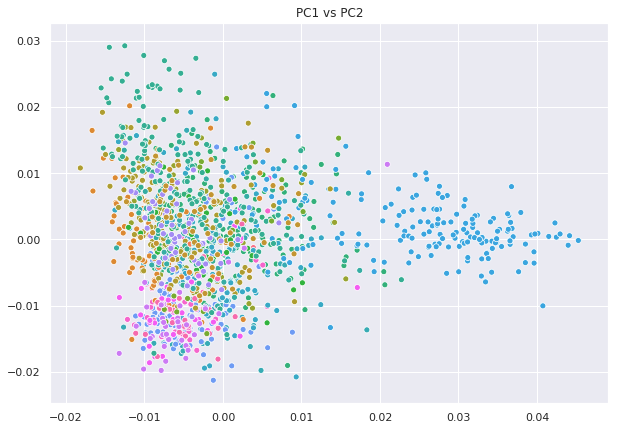

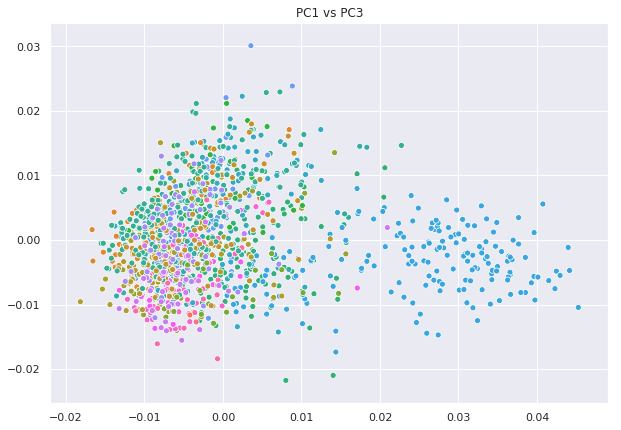

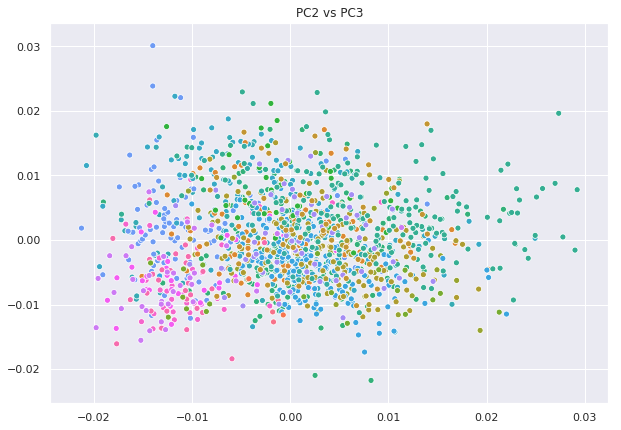

In [11]:

def pca_plots(vectors, labels):
    pca = PCA(n_components=3)
    pca.fit(vectors)
    pc_vectors = pca.transform(vectors)
    
    x = pc_vectors[:, 0]
    y = pc_vectors[:, 1]
    z = pc_vectors[:, 2]
    
    plt.figure(figsize=(10, 7))
    plt.title('PC1 vs PC2')
    ax = sns.scatterplot(x=x, y=y, hue=labels, legend=False)
    plt.show()
    
    plt.figure(figsize=(10, 7))
    plt.title('PC1 vs PC3')
    ax = sns.scatterplot(x=x, y=z, hue=labels, legend=False)
    plt.show()
    
    plt.figure(figsize=(10, 7))
    plt.title('PC2 vs PC3')
    ax = sns.scatterplot(x=y, y=z, hue=labels, legend=False)
    plt.show()

pca_plots(frame_vectors, labels)

In [10]:
print(frame_vectors.shape)

(1394, 512)


In [12]:

# Try batch averaging

batch_size = 2

new_frame_times = []
new_labels = []
new_vectors = []

for lbl in train_df.video_path.unique():
    lbl_df = train_df[train_df.video_path == lbl]
    lbl_vectors = lbl_df.drop(['frame_time', 'video_path'], axis=1).values
    for i in range(0, len(lbl_vectors)+batch_size, batch_size):
        vecs = lbl_vectors[i:i+batch_size]
        if not vecs.any():
            continue
        mean_vec = np.mean(vecs, axis=0)
        new_vectors.append(mean_vec)
        new_labels.append(lbl)
        new_frame_times.append(lbl_df.frame_time.iloc[0])
new_labels = np.array(new_labels)
new_vectors = np.array(new_vectors)
print(new_labels.shape)
print(new_vectors.shape)

(703,)
(703, 512)


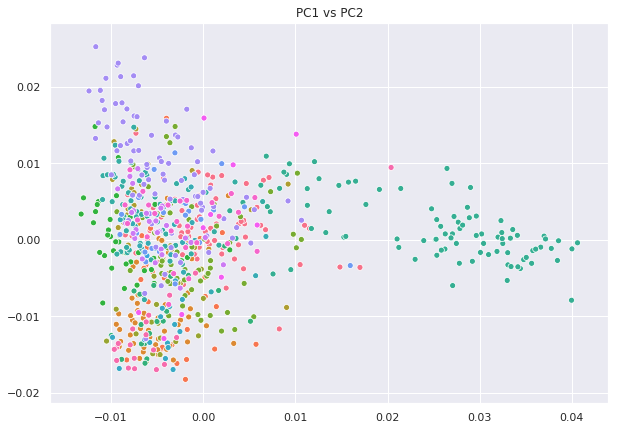

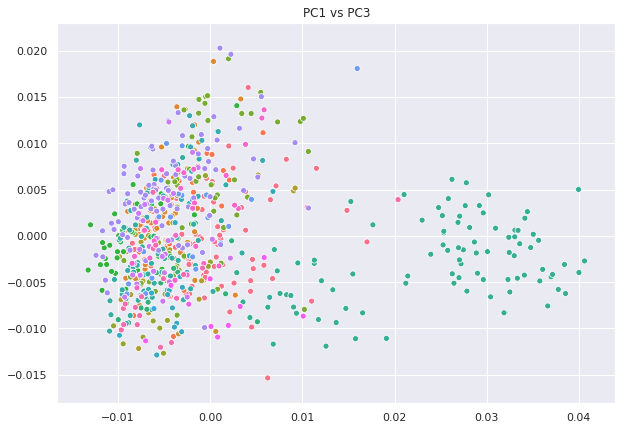

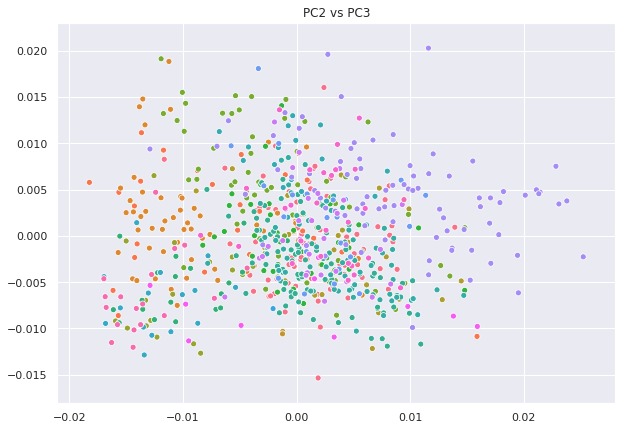

In [13]:
pca_plots(new_vectors, new_labels)

In [14]:
cols = {'frame_time': new_frame_times,
                       'video_path': new_labels}
for i in range(new_vectors.shape[1]):
    cols['x_'+str(i)] = new_vectors[:, i]
new_df = pd.DataFrame(cols)
print(train_df.shape)
print(new_df.shape)

(1394, 514)
(703, 514)


In [15]:
#new_df.to_csv('data/LOCALHIST_CORRUPT_batchavg_df.csv', index=False)